**Nama : Nuzulurrahmah**

**NPM  : 2108107010012**

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Collecting Data
Dataset yang digunakan dalam menyelesaikan tugas 2 ini adalah Boston-Housing yang digunakan untuk memprediksi harga dari suatu rumah di Boston berdasarkan beberapa fitur

Link:https://www.kaggle.com/datasets/schirmerchad/bostonhoustingmlnd


**Columns Desc**

RM : average number of rooms per dweling

LSTAT: %lower status of the population

PTRATIO: pupil-teacher ratio by town

MEDV: Median value of owner-occupied homes in $1000's


In [ ]:
df = pd.read_csv("housing.csv")
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [ ]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


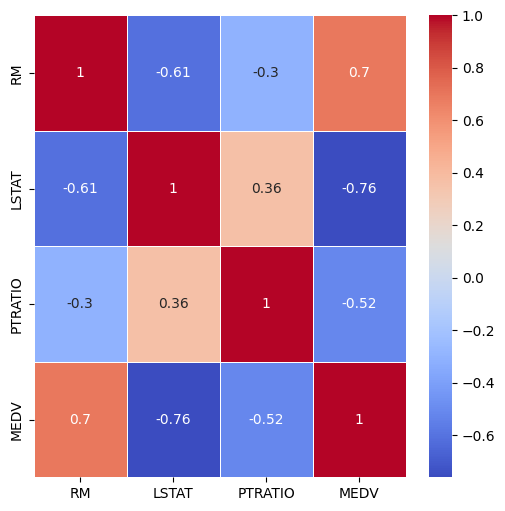

In [ ]:
import seaborn as sns

plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=0.5)
plt.show()

Berdasarkan heapmap diatas, dapat diketahui bahwa RM memiliki korlelasi yang kuat terhadap MEDV. Oleh karena itu, RM akan digunaakn sebagaii var indepent dalam pembangunan model selanjutnya

In [ ]:
df.corr()

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


## Pre processing


In [ ]:
X = df.iloc[:, 0].values.reshape(-1, 1)
y = df['MEDV'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [ ]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

In [ ]:
print(X_train_scaled.shape)
print(y_train_scaled.shape)

(391, 1)
(391,)


## Bangun Model

### Linear


In [ ]:
# SVR Linear
from sklearn.svm import SVR

svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train_scaled, y_train_scaled)

SVR(kernel='linear')

### RBF

In [ ]:
svr_rbf = SVR(kernel='rbf', gamma=0.01, C=1, epsilon=0.5,  degree=5)
svr_rbf.fit(X_train_scaled, y_train_scaled)


SVR(C=1, degree=5, epsilon=0.5, gamma=0.01)

In [ ]:
y_pred_train_linear = svr_linear.predict(X_train_scaled)
y_pred_test_linear = svr_linear.predict(X_test_scaled)
y_pred_train_rbf = svr_rbf.predict(X_train_scaled)
y_pred_test_rbf = svr_rbf.predict(X_test_scaled)

In [ ]:
# Inverse transform the scaled predictions to get actual predictions
y_pred_train_actual_linear = scaler_y.inverse_transform(y_pred_train_linear.reshape(-1, 1)).ravel()
y_pred_test_actual_linear = scaler_y.inverse_transform(y_pred_test_linear.reshape(-1, 1)).ravel()
y_pred_train_actual_rbf = scaler_y.inverse_transform(y_pred_train_rbf.reshape(-1, 1)).ravel()
y_pred_test_actual_rbf = scaler_y.inverse_transform(y_pred_test_rbf.reshape(-1, 1)).ravel()

## Visualisasi


### Linear


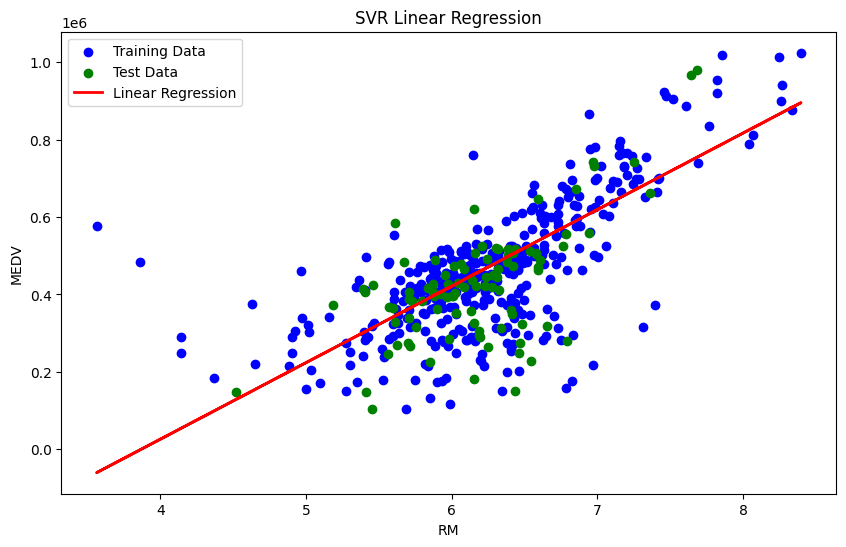

In [ ]:
# Plot linear regression
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_train, y_pred_train_actual_linear, color='red', linewidth=2, label='Linear Regression')
plt.title('SVR Linear Regression')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend()
plt.show()

### RBF

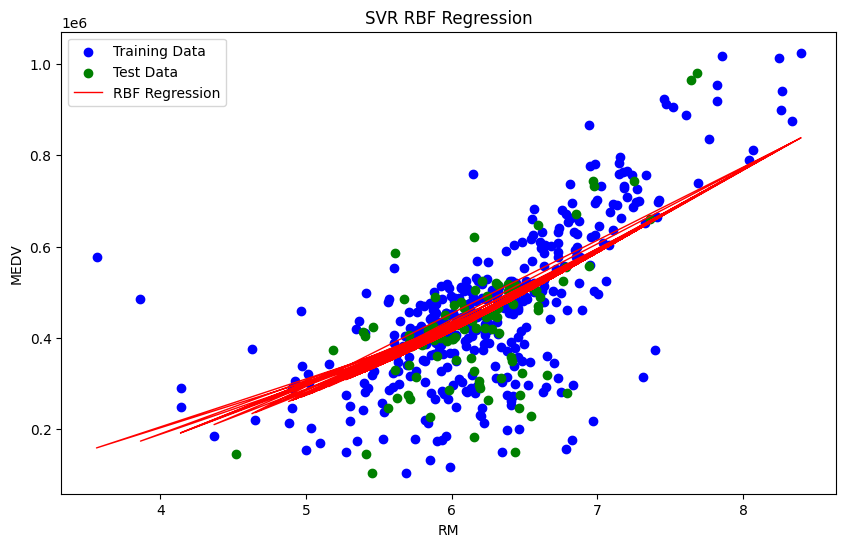

In [ ]:
# Plot RBF regression
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_train, y_pred_train_actual_rbf, color='red', linewidth=1, label='RBF Regression')
plt.title('SVR RBF Regression')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend()
plt.show()